In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [31]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
print("Feature and their types:")
df.dtypes

Feature and their types:


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

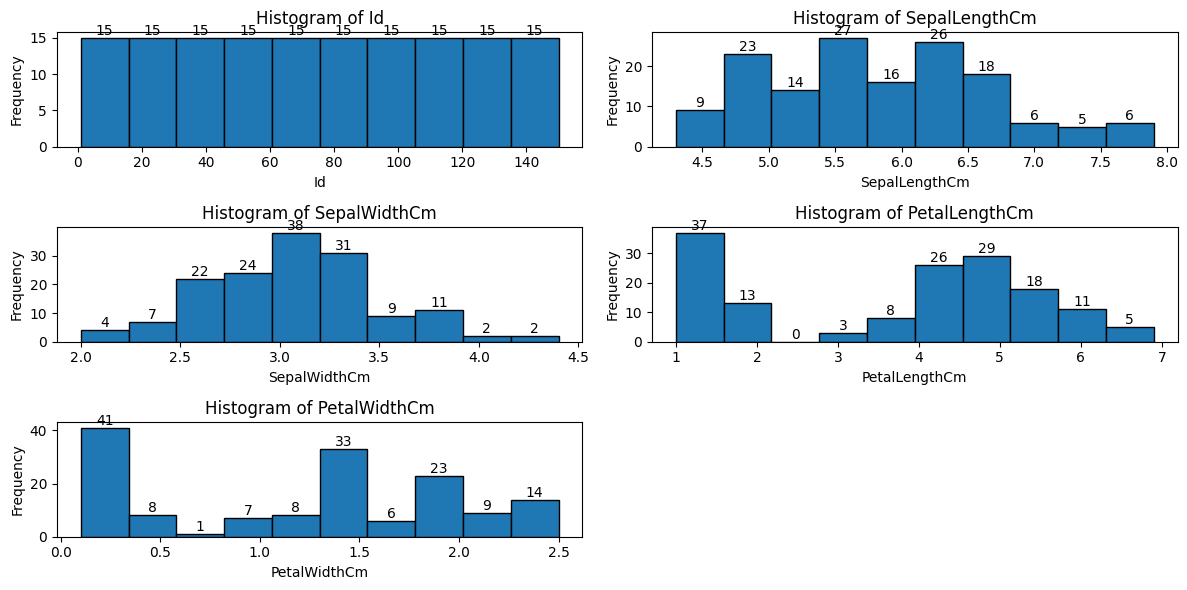

In [33]:

num_plots = len(df.columns) - 1 
cols = 2
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(12, 6))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(rows, cols, i + 1)
    counts, bins, patches = plt.hist(df[column], edgecolor="black")

    for count, patch in zip(counts, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count,
                 str(int(count)), ha='center', va='bottom')

    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


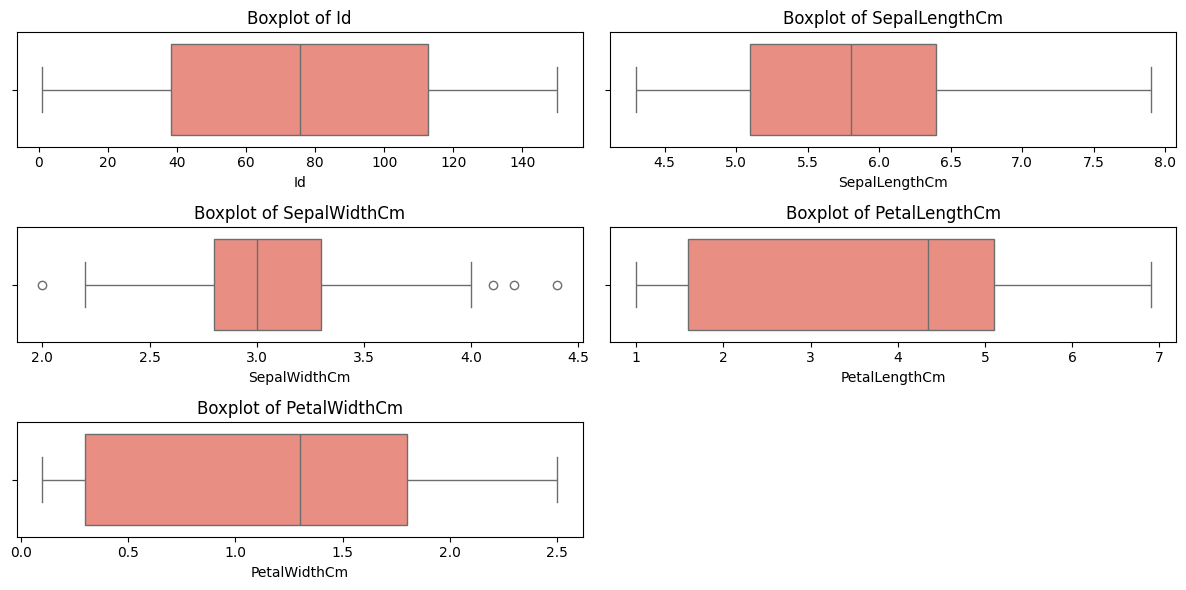

In [34]:
columns = df.columns[:-1] 
n = len(columns)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(12, 6))

for i, column in enumerate(columns):
    ax = plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df[column], ax=ax, color='salmon')
    ax.set_title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [35]:
for column in df.columns[:-1]:  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    print(f"\nFeature: {column}")
    print(f"  Mean: {df[column].mean():.2f}, Median: {df[column].median():.2f}, Std Dev: {df[column].std():.2f}")
    print(f"  Outliers Detected: {'Yes' if not outliers.empty else 'No'}","\n  " f"Outlier Values: {outliers.tolist()}" if not outliers.empty else "")
    print("-" * 40)


Feature: Id
  Mean: 75.50, Median: 75.50, Std Dev: 43.45
  Outliers Detected: No 
----------------------------------------

Feature: SepalLengthCm
  Mean: 5.84, Median: 5.80, Std Dev: 0.83
  Outliers Detected: No 
----------------------------------------

Feature: SepalWidthCm
  Mean: 3.05, Median: 3.00, Std Dev: 0.43
  Outliers Detected: Yes 
  Outlier Values: [4.4, 4.1, 4.2, 2.0]
----------------------------------------

Feature: PetalLengthCm
  Mean: 3.76, Median: 4.35, Std Dev: 1.76
  Outliers Detected: No 
----------------------------------------

Feature: PetalWidthCm
  Mean: 1.20, Median: 1.30, Std Dev: 0.76
  Outliers Detected: No 
----------------------------------------


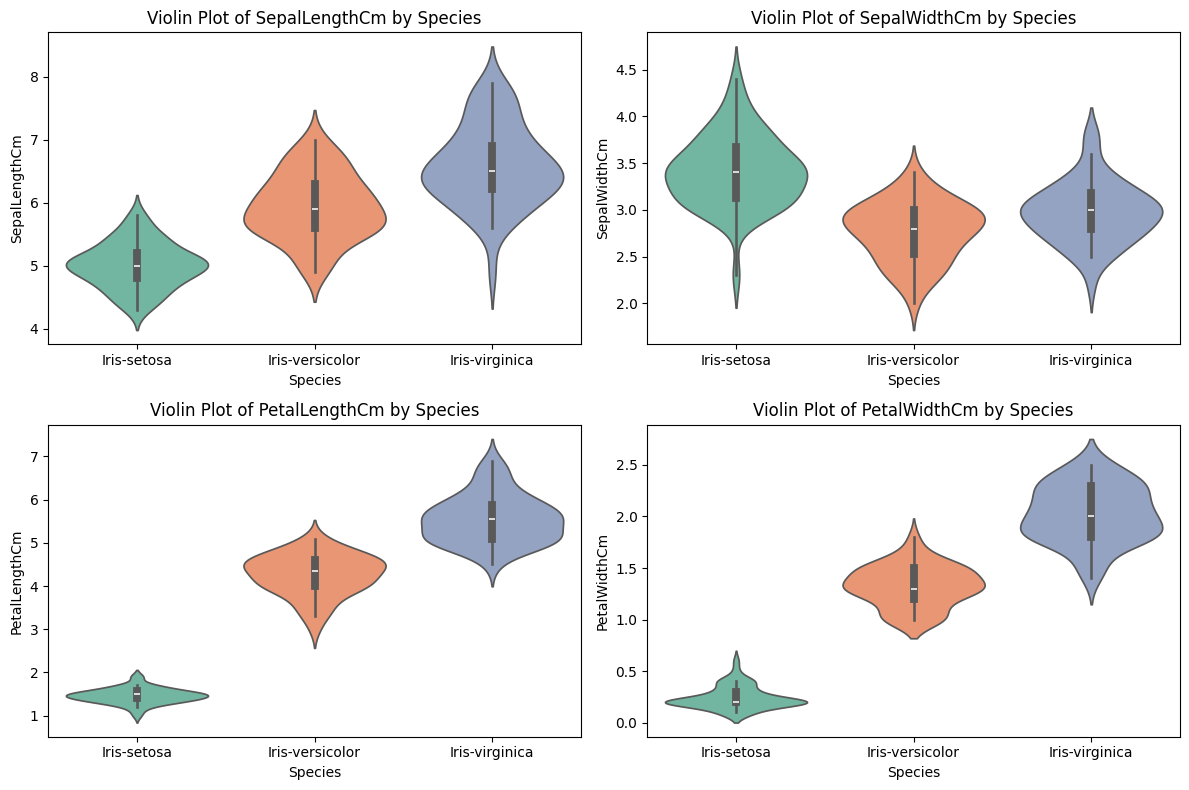

In [36]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(df.columns[1:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x="Species", y=column, data=df, hue="Species", palette="Set2", legend=False)
    plt.title(f"Violin Plot of {column} by Species")

plt.tight_layout()
plt.show()